In [1]:
from fastai.vision import *

In [2]:
folder = 'Human'
file = 'hum.txt'
folder2 = 'Neanderthal'
file2 = 'nean.txt'

In [5]:
path = Path('data/specie')
dest = path/folder
dest2 = path/folder2
dest.mkdir(parents=True, exist_ok=True)
dest2.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[WindowsPath('data/specie/hum.txt'),
 WindowsPath('data/specie/Human'),
 WindowsPath('data/specie/nean.txt'),
 WindowsPath('data/specie/Neanderthal')]

In [7]:
download_images(path/file,dest)
download_images(path/file2,dest2)

In [8]:
np.random.seed(32)
data = ImageDataBunch.from_folder(path, train='.',valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data

ImageDataBunch;

Train: LabelList (126 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Human,Human,Human,Human,Human
Path: data\specie;

Valid: LabelList (31 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Human,Neanderthal,Human,Neanderthal,Neanderthal
Path: data\specie;

Test: None

In [10]:
data.classes

['Human', 'Neanderthal']

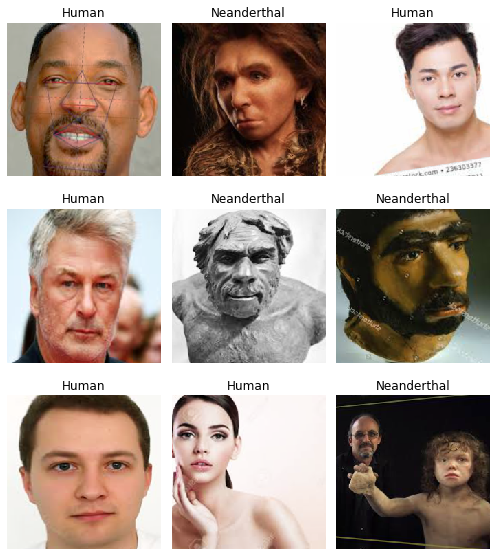

In [13]:
data.show_batch(rows=3,figsize=(7,8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Human', 'Neanderthal'], 2, 126, 31)

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.453591,1.408357,0.451613,00:36
1,1.373721,0.626112,0.129032,00:19
2,0.991389,0.554492,0.129032,00:19
3,0.819529,0.489000,0.096774,00:19


In [18]:
learn.unfreeze()

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


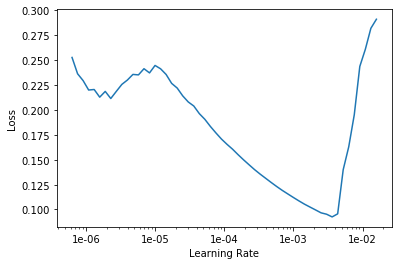

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.328407,0.406451,0.064516,00:20
1,0.276160,0.280834,0.064516,00:22


In [22]:
interp = ClassificationInterpretation.from_learner(learn)

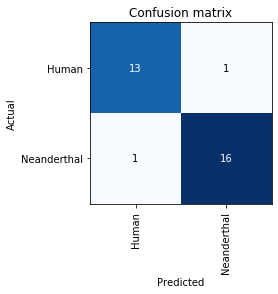

In [23]:
interp.plot_confusion_matrix()